In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis
T=10
n_sim=10000
buy_year=5
a_0=0.4
a_sigma=0.1
b_0=0.6
b_sigma=0.05
c_0=0.5
c_sigma=0.05
d_0=0.1
d_sigma=0.15
e_0=0.3
e_sigma=0.1
rng = np.random.RandomState(1)
a = np.c_[np.ones((n_sim, 1))*a_0, np.empty([n_sim, T - 1])]
b = np.c_[np.ones((n_sim, 1))*b_0, np.empty([n_sim, T - 1])]
c = np.c_[np.ones((n_sim, 1))*c_0, np.empty([n_sim, T - 1])]
d = np.c_[np.ones((n_sim, 1))*d_0, np.empty([n_sim, T - 1])]
e = np.c_[np.ones((n_sim, 1))*e_0, np.empty([n_sim, T - 1])]
for t in np.arange(1,T):
    a[:, t] = a[:, t - 1] * np.exp(0.01-0.5*(a_sigma**2)*1 + 
                                           a_sigma*rng.randn(n_sim).T)
    b[:, t] = b[:, t - 1] * np.exp(0.02-0.5*((b_sigma)**2)*1 +
                                            b_sigma*rng.randn(n_sim).T)
    c[:, t] = c[:, t - 1] * np.exp(0.05-0.5*((c_sigma)**2)*1 +
                                            c_sigma*rng.randn(n_sim).T)
    
    d[:, t] = d[:, t - 1] * np.exp(0.07-0.5*((d_sigma)**2)*1 +
                                            d_sigma*rng.randn(n_sim).T)
    
    e[:, t] = e[:, t - 1] * np.exp(0.1-0.5*((e_sigma)**2)*1 +
                                            e_sigma*rng.randn(n_sim).T)

In [2]:
import numpy as np
import pandas as pd  
from numpy import newaxis
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split,ShuffleSplit,learning_curve
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import backend as K
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import numpy as np

algorithmName = []
trainingAccList = []
testingAccList = []
mseList = []
RMSE=[]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
Li_rate=a*b*(1-c)*(1-d)*(1-e)


In [4]:
Li1 = (Li_rate[:, buy_year:]).sum(axis=1)

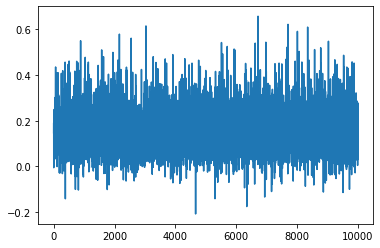

In [5]:
plt.plot(Li1)

In [6]:
X_a = a[:, buy_year]
X_b = b[:, buy_year]
X_c = c[:, buy_year]
X_d = d[:, buy_year]
X_e = e[:, buy_year]
X = np.c_[X_a, X_b,X_c,X_d,X_e]
Y = Li1[..., newaxis]

train_X = X[500:]
test_X = X[:500]
train_Y = Y[500:]
test_Y = Y[:500]
print("Traing data size: ", train_X.shape)
print("Testing data size: ", test_X.shape)

Traing data size:  (9500, 5)
Testing data size:  (500, 5)


In [7]:
lr = LinearRegression()
lr.fit(train_X, train_Y)
algorithmName.append("LR")
score_lr = lr.score(train_X, train_Y)  
print("Training score: ", score_lr*100,"%")
trainingAccList.append(score_lr)
print("Testing score: ", lr.score(test_X, test_Y)*100,"%")
testingAccList.append(lr.score(test_X, test_Y))
cv_pred_lr = lr.predict(test_X)
mse = mean_squared_error(test_Y, cv_pred_lr)
mseList.append(mse)
RMSE.append(np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr)))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr)))
print("testing R2 score",r2_score(test_Y, cv_pred_lr)) 

Training score:  73.64311251415742 %
Testing score:  66.64206992090398 %
MSE: 0.00
RMSE: 0.05
testing R2 score 0.6664206992090397


In [21]:
List=[]
for i in cv_pred_lr:
  if i<0.17:
    List.append(-60)
  elif 0.17<i<0.25:
    List.append(100)
  elif 0.25<i<0.4:
    List.append(200)
  elif 0.4<i<0.5:
    List.append(300)
  else:
    List.append(400)
a=np.mean(List, axis=0)
print(a)

3.52


In [25]:
import lightgbm as ltb
D = ltb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.09, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=20)
D.fit(train_X, train_Y) 
algorithmName.append("LGBMRegressor") 
score_lr_D = D.score(train_X, train_Y)  
print("Training score: ", score_lr_D*100,"%")
trainingAccList.append(score_lr_D)

print("Testing score: ", D.score(test_X, test_Y)*100,"%")
testingAccList.append(D.score(test_X, test_Y))
cv_pred_lr_D = D.predict(test_X)

mse = mean_squared_error(test_Y, cv_pred_lr_D)
mseList.append(mse)
RMSE.append(np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("testing R2 score",r2_score(test_Y, cv_pred_lr_D)) 

Training score:  77.14771440255814 %
Testing score:  70.9463752415638 %
MSE: 0.00
RMSE: 0.04
testing R2 score 0.709463752415638


In [26]:
List=[]
for i in cv_pred_lr_D:
  if i<0.17:
    List.append(-60)
  elif 0.17<i<0.25:
    List.append(100)
  elif 0.25<i<0.4:
    List.append(200)
  elif 0.4<i<0.5:
    List.append(300)
  else:
    List.append(400)
a=np.mean(List, axis=0)
print(a)

0.84


In [35]:
import xgboost as xgb
D = xgb.XGBRegressor()
D.fit(train_X, train_Y)
algorithmName.append("XGBRegressor")
score_lr_D = D.score(train_X, train_Y)  
print("Training score: ", score_lr_D*100,"%")
trainingAccList.append(score_lr_D)

print("Testing score: ", D.score(test_X, test_Y)*100,"%")
testingAccList.append(D.score(test_X, test_Y))
cv_pred_lr_D = D.predict(test_X)

mse = mean_squared_error(test_Y, cv_pred_lr_D)
mseList.append(mse)
RMSE.append(np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("testing R2 score",r2_score(test_Y, cv_pred_lr_D)) 

[18:55:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  81.78249275175112 %
Testing score:  73.95891162715773 %
MSE: 0.00
RMSE: 0.04
testing R2 score 0.7395891162715773


In [36]:
List=[]
for i in cv_pred_lr_D:
  if i<0.17:
    List.append(-60)
  elif 0.17<i<0.25:
    List.append(100)
  elif 0.25<i<0.4:
    List.append(200)
  elif 0.4<i<0.5:
    List.append(300)
  else:
    List.append(400)
a=np.mean(List, axis=0)
print(a)

-3.24


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
D = GradientBoostingRegressor(random_state=0)
# training process
D.fit(train_X, train_Y)
algorithmName.append("GradientBoostingRegressor")
score_lr_D = D.score(train_X, train_Y)  
print("Training score: ", score_lr_D*100,"%")
trainingAccList.append(score_lr_D)

print("Testing score: ", D.score(test_X, test_Y)*100,"%")
testingAccList.append(D.score(test_X, test_Y))
cv_pred_lr_D = D.predict(test_X)

mse = mean_squared_error(test_Y, cv_pred_lr_D)
mseList.append(mse)
RMSE.append(np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("testing R2 score",r2_score(test_Y, cv_pred_lr_D)) 

Training score:  81.87660240503126 %
Testing score:  74.4991321626497 %
MSE: 0.00
RMSE: 0.04
testing R2 score 0.744991321626497


In [34]:
List=[]
for i in cv_pred_lr_D:
  if i<0.17:
    List.append(-60)
  elif 0.17<i<0.25:
    List.append(100)
  elif 0.25<i<0.4:
    List.append(200)
  elif 0.4<i<0.5:
    List.append(300)
  else:
    List.append(400)
a=np.mean(List, axis=0)
print(a)

-3.44


In [31]:
D=RandomForestRegressor(max_depth=40,min_samples_leaf=3,min_samples_split=2,n_estimators=12)
# training process
D.fit(train_X, train_Y)
algorithmName.append("RandomForestRegressor")
score_lr_D = D.score(train_X, train_Y)  
print("Training score: ", score_lr_D*100,"%")
trainingAccList.append(score_lr_D)

print("Testing score: ", D.score(test_X, test_Y)*100,"%")
testingAccList.append(D.score(test_X, test_Y))
cv_pred_lr_D = D.predict(test_X)

mse = mean_squared_error(test_Y, cv_pred_lr_D)
mseList.append(mse)
RMSE.append(np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(metrics.mean_squared_error(test_Y, cv_pred_lr_D)))
print("testing R2 score",r2_score(test_Y, cv_pred_lr_D)) 

Training score:  91.97492555426852 %
Testing score:  73.18926056151166 %
MSE: 0.00
RMSE: 0.04
testing R2 score 0.7318926056151165


In [32]:
List=[]
for i in cv_pred_lr_D:
  if i<0.17:
    List.append(-60)
  elif 0.17<i<0.25:
    List.append(100)
  elif 0.25<i<0.4:
    List.append(200)
  elif 0.4<i<0.5:
    List.append(300)
  else:
    List.append(400)
a=np.mean(List, axis=0)
print(a)

-1.4


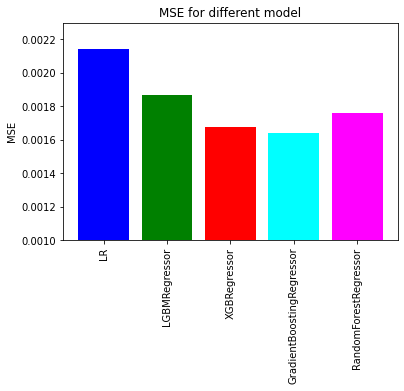

In [17]:
import numpy as np
import matplotlib.pyplot as plt
height =mseList
bars = ('LR',
 'LGBMRegressor',
 'XGBRegressor',
 'GradientBoostingRegressor',
 'RandomForestRegressor')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = ['blue','green','red','cyan','magenta','yellow'])
plt.title('MSE for different model')
plt.ylabel('MSE')
Limit=min(mseList)
plt.ylim(0.001, 0.0023)
plt.xticks(y_pos, bars,rotation=90)
plt.show()